### Take a look at some of the preference-selective units during periods, see whether they're value-selective

In [3]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools
from scipy import stats


### Plotting Func

In [4]:
def plot(args, unit_row):
    unit_id = int(unit_row.PseudoUnitID)
    args.feat = unit_row.feat
    fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey="row")

    args.beh_filters = {"PreferredChosen":True}
    beh, frs = load_data(int(unit_id / 100), args, return_merged=False)
    data = pd.merge(beh, frs, on="TrialNumber")
    data = data[data.PseudoUnitID == unit_id]
    cond_order = np.sort(data["FeatPreferred"].unique())

    sns.lineplot(data, x="Time", y="FiringRate", hue="FeatPreferred", hue_order=cond_order, errorbar="se", ax=axs[0, 0])
    sns.barplot(data, x="FeatPreferred", y="FiringRate", ax=axs[1, 0], order=cond_order)

    # args.beh_filters = {"PreferredChosen":True}
    # beh, frs = load_data(int(unit_id / 100), args, return_merged=False)
    # visualization_utils.visualize_cond_psth(beh, frs, unit_id, "BeliefStateValue", axs[0, 1], num_bins=10)
    # r, p = visualization_utils.visualize_cond_correlations(beh, frs, unit_id, f"BeliefStateValue", axs[1, 1])
    # axs[1, 1].set_title(f"Pref, r: {r:.3f}, p: {p:.3E}")


    # args.beh_filters = {"PreferredChosen":True}
    # beh, frs = load_data(int(unit_id / 100), args, return_merged=False)
    
    # pref_beh = beh[beh.FeatPreferred == "Preferred"]
    # visualization_utils.visualize_cond_psth(pref_beh, frs, unit_id, "BeliefStateValue", axs[0, 1], num_bins=10)
    # r, p = visualization_utils.visualize_cond_correlations(pref_beh, frs, unit_id, f"BeliefStateValue", axs[1, 1])
    # axs[1, 1].set_title(f"Pref, r: {r:.3f}, p: {p:.3E}")

    not_pref_beh = beh[beh.FeatPreferred == "Not Preferred"]
    visualization_utils.visualize_cond_psth(not_pref_beh, frs, unit_id, "BeliefStateValue", axs[0, 1], num_bins=10)
    r, p = visualization_utils.visualize_cond_correlations(not_pref_beh, frs, unit_id, f"BeliefStateValue", axs[1, 1])
    axs[1, 2].set_title(f"Not Pref, r: {r:.3f}, p: {p:.3E}")

    axs[0, 0].set_title(f"{unit_id}, {unit_row.feat}/correct, var: {unit_row.combined_fracvar:.3f}, {unit_row.structure_level2}")
    fig.tight_layout()

In [5]:
args = argparse.Namespace(
    **AnovaConfigs()._asdict()
)
args.trial_event = "StimOnset"
args.conditions = ["FeatPreferred"]
# args.conditions = ["Response", "Choice"]
args.time_range = [-1000, 0]
args.beh_filters = {"Response":"Correct","Choice":"Chose","PreferredChosen":True}
good_pref_stim_res = io_utils.read_anova_good_units(args, "99th")

### Plot feature preference selectivity on left, belief state value correlation on right

/src/wcst_decode/utils/visualization_utils.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beh[f"{cond}Label"] = bins[out]
/src/wcst_decode/utils/visualization_utils.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beh[f"{cond}Label"] = bins[out]
/src/wcst_decode/utils/visualization_utils.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

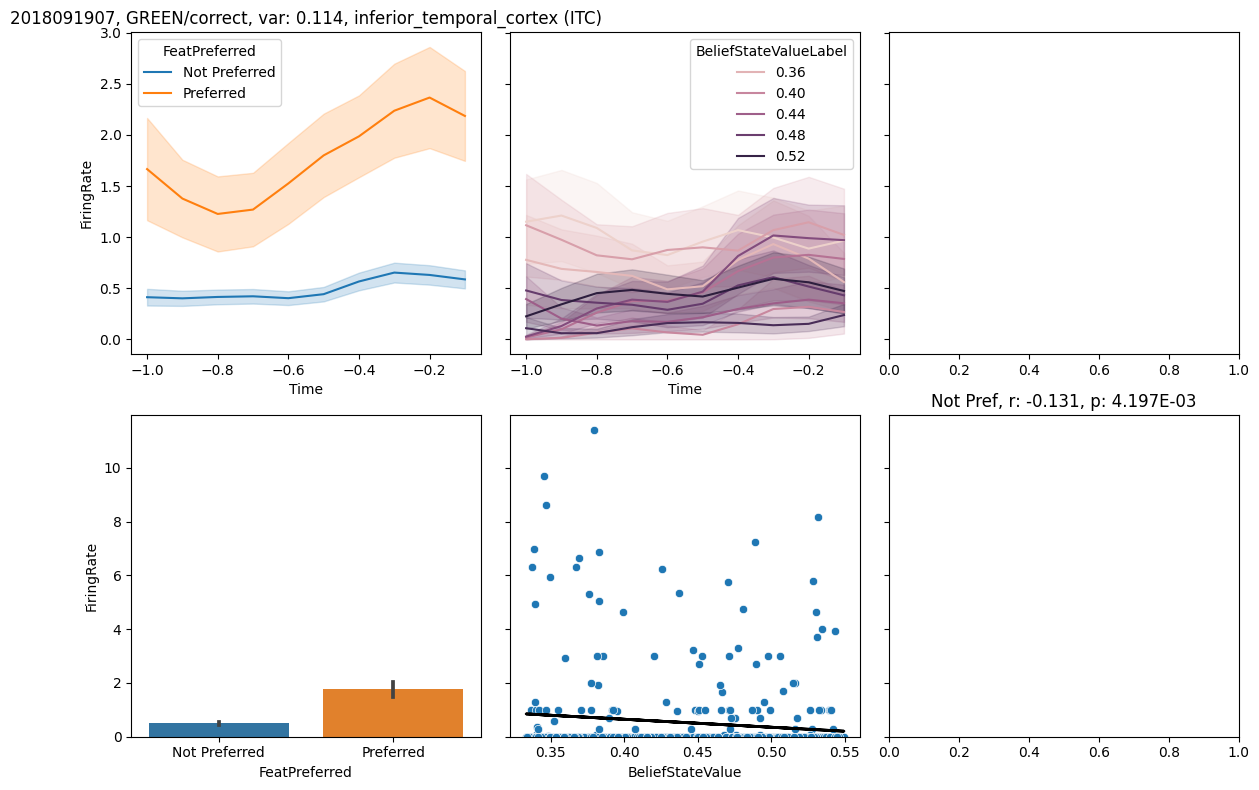

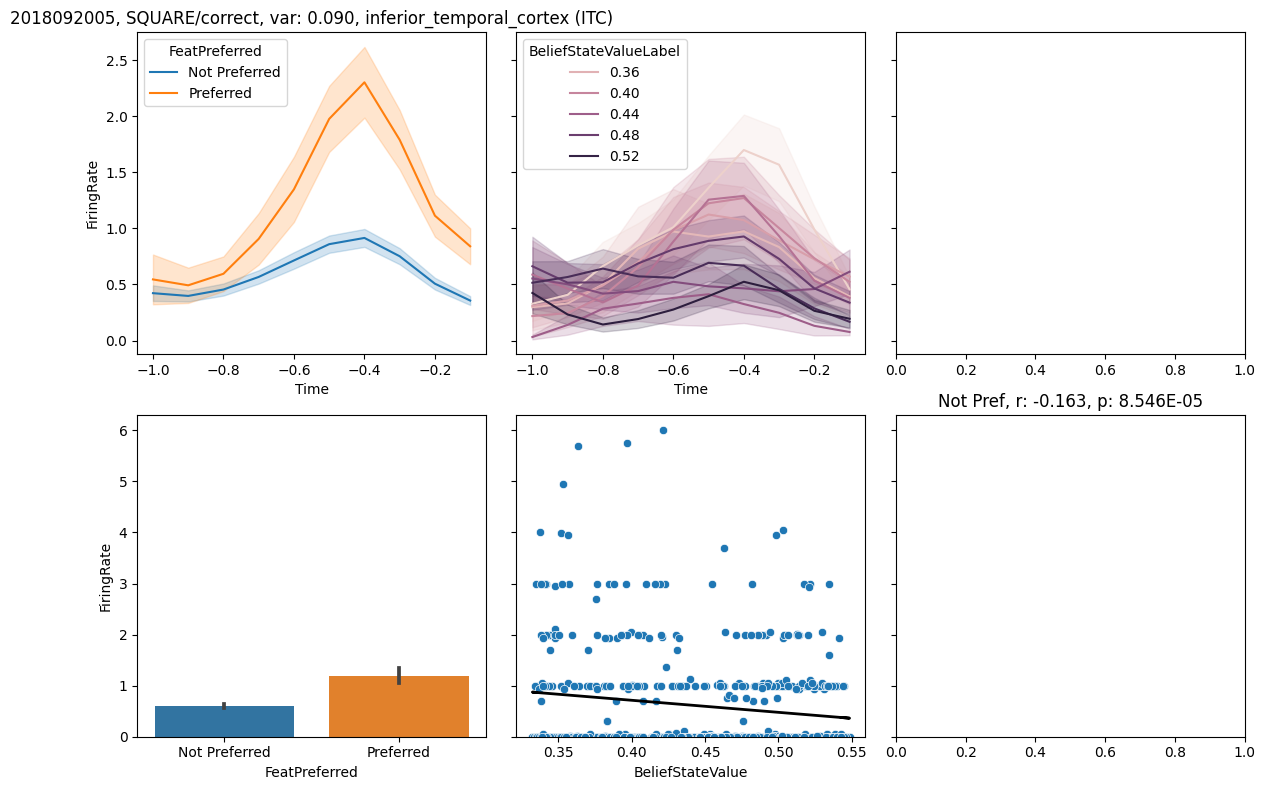

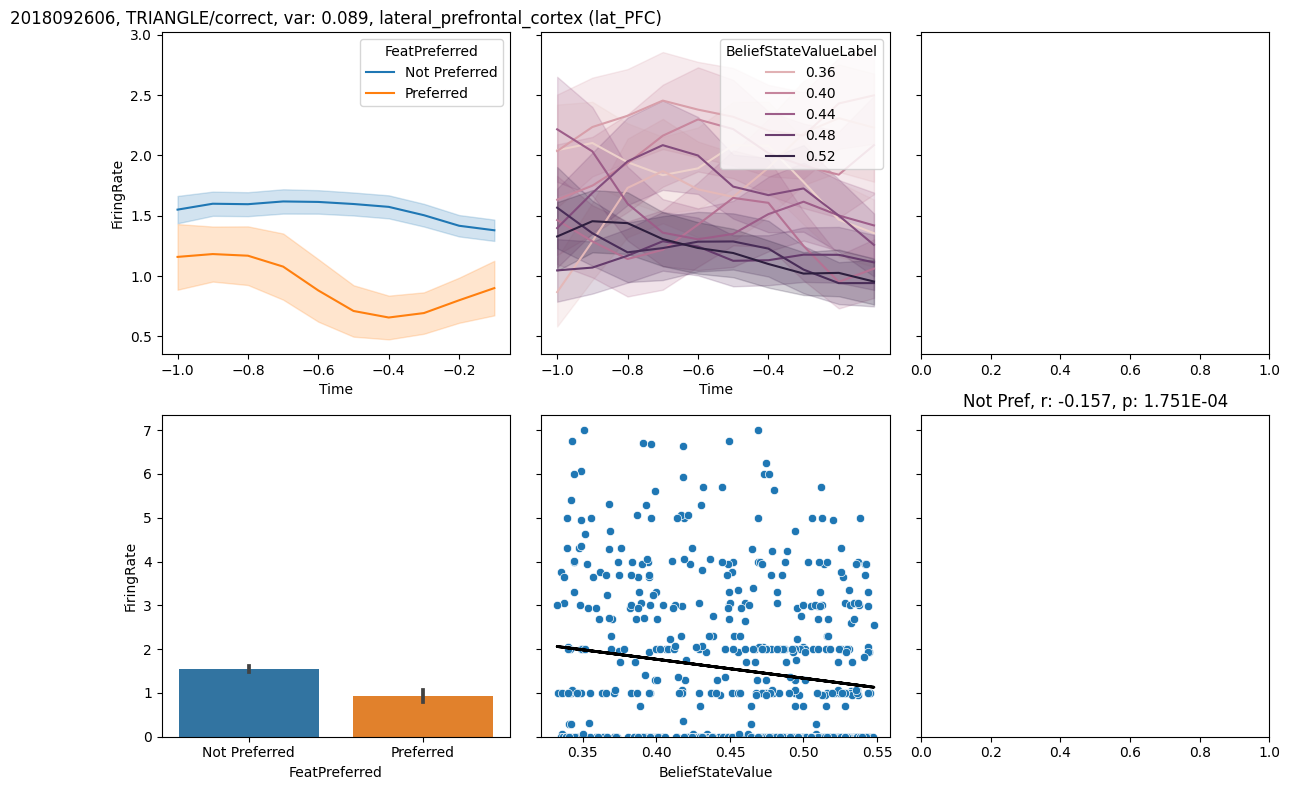

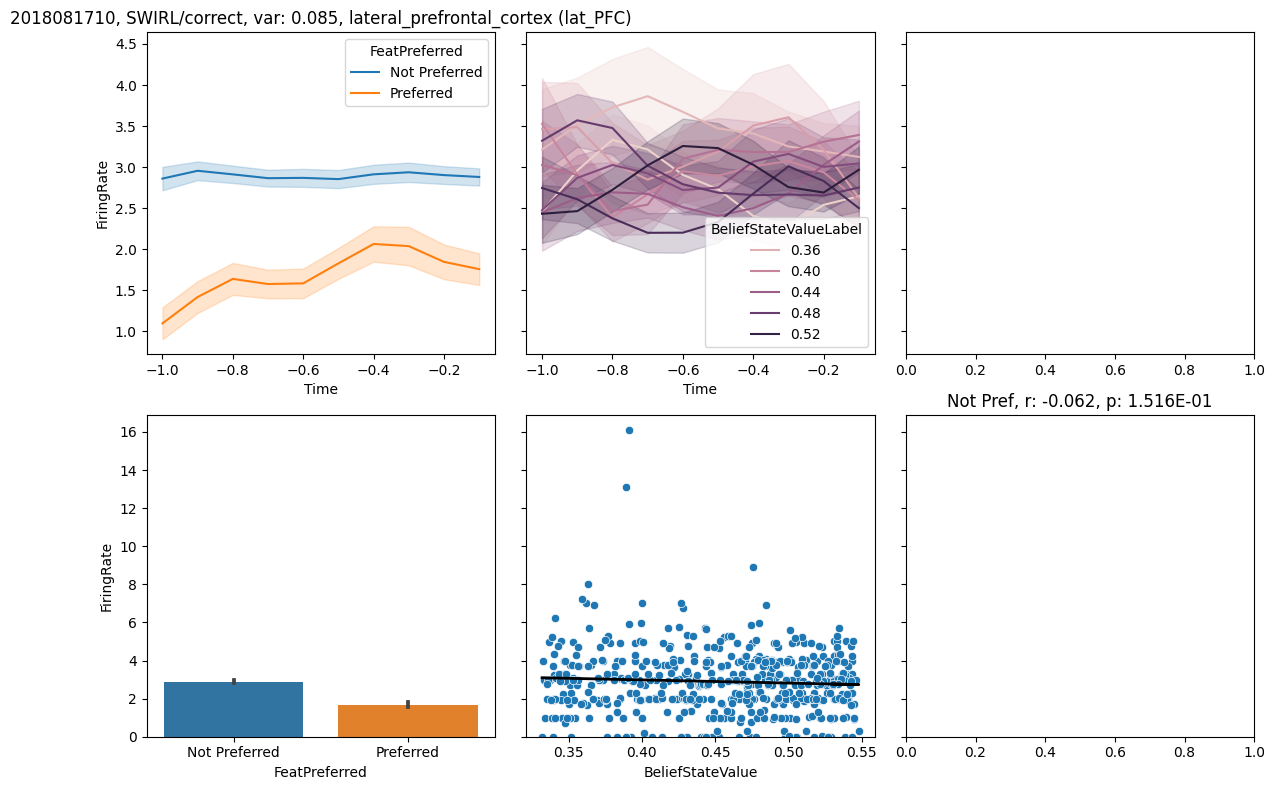

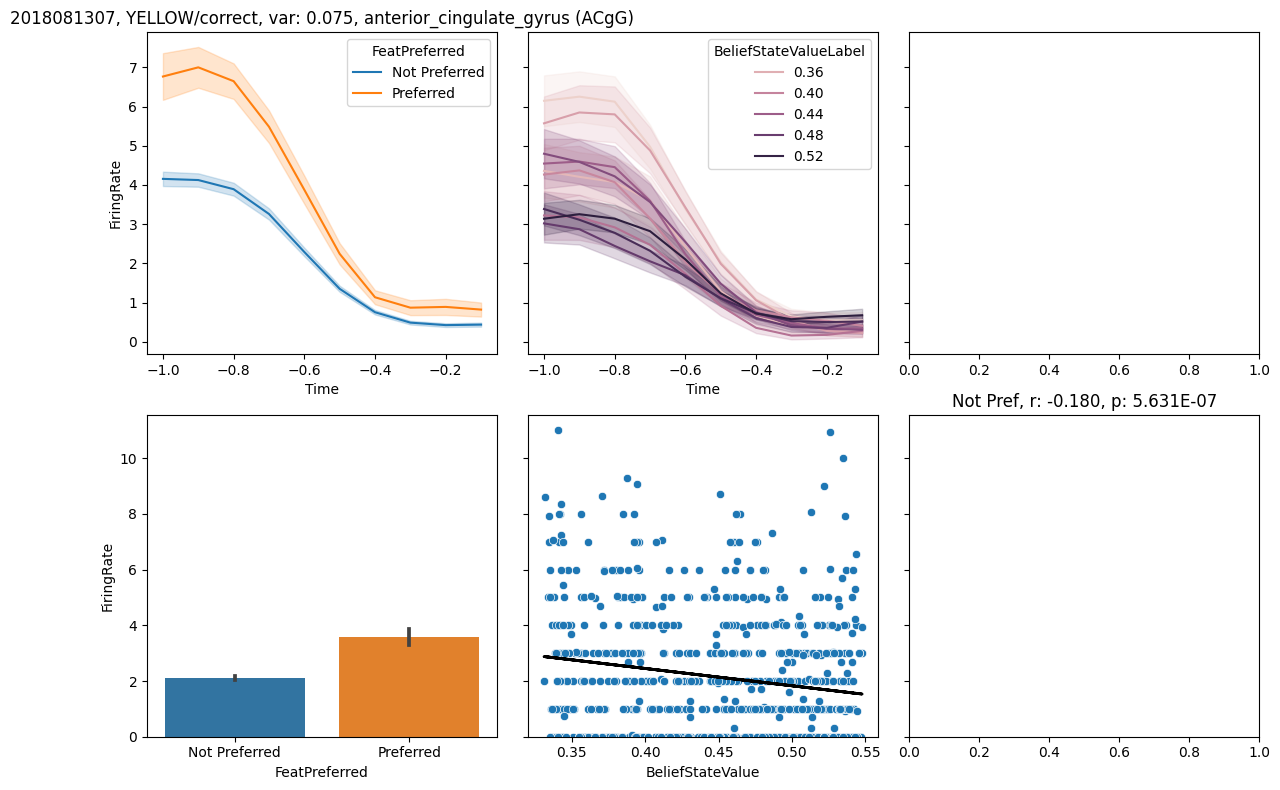

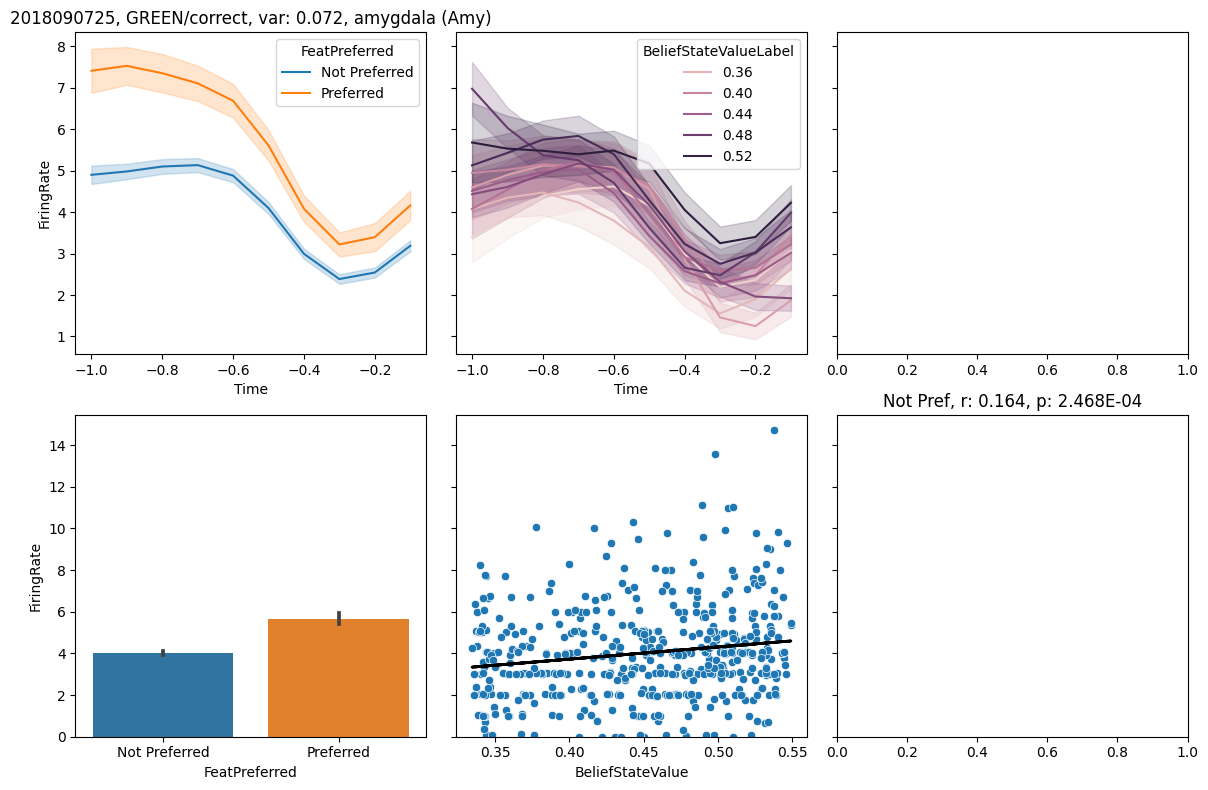

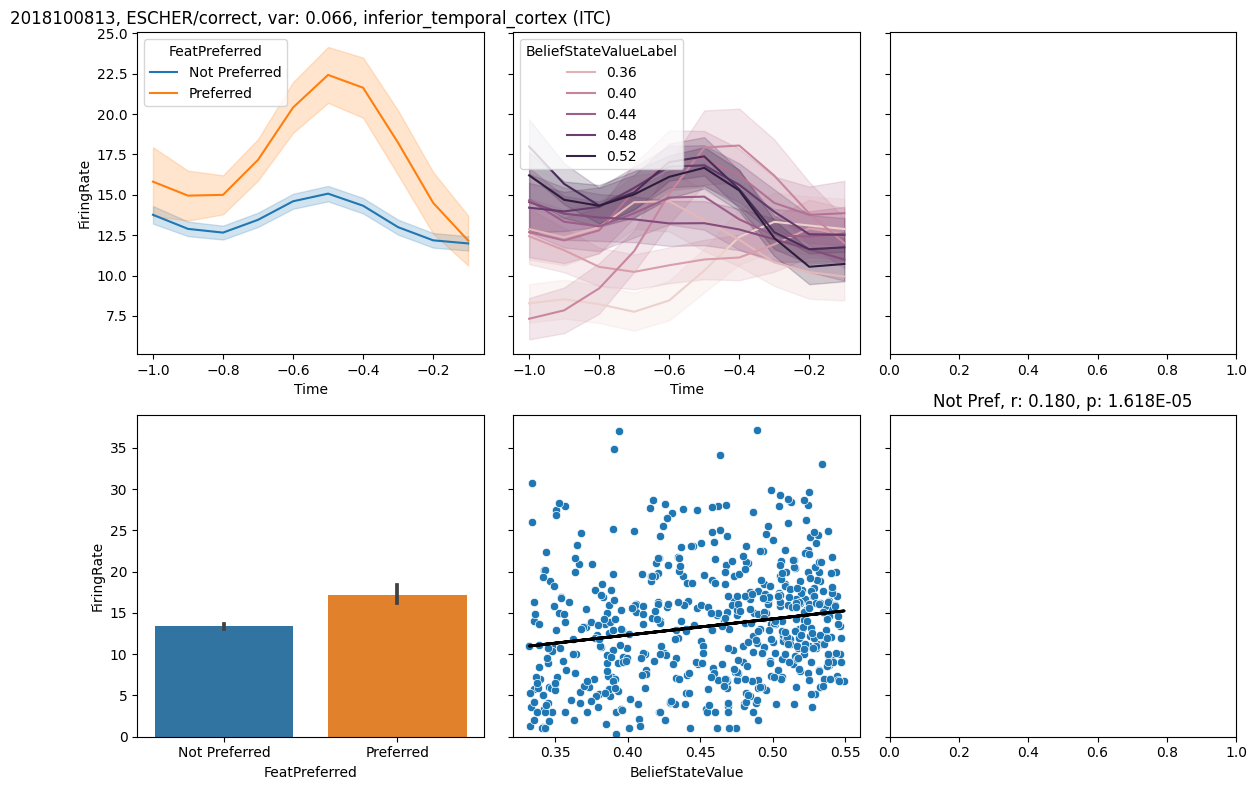

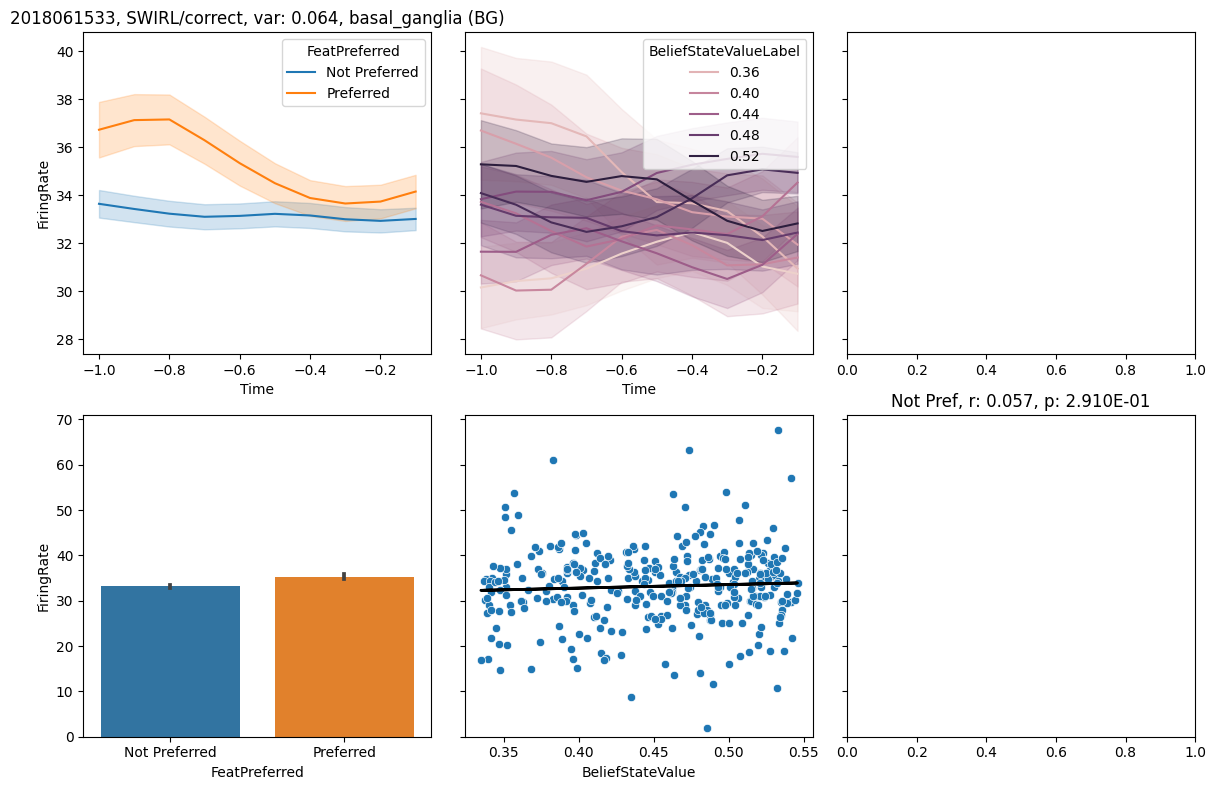

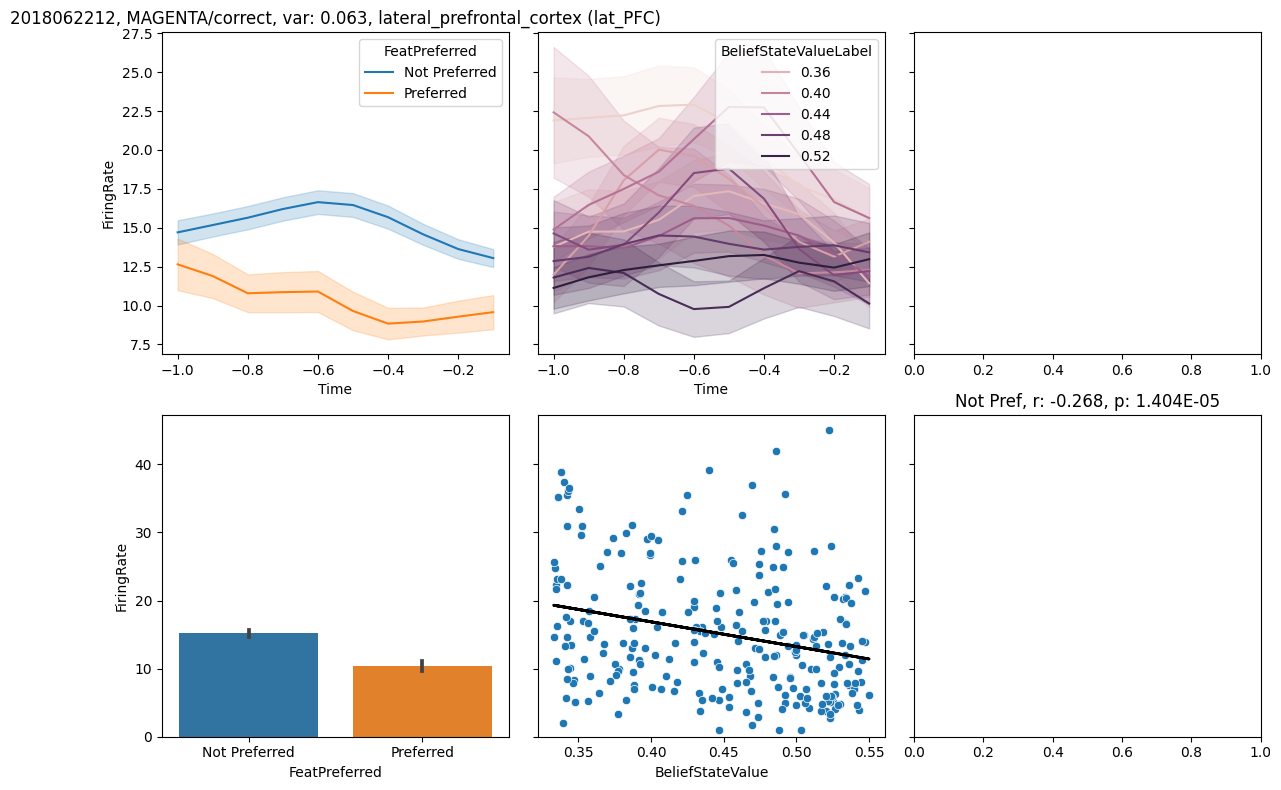

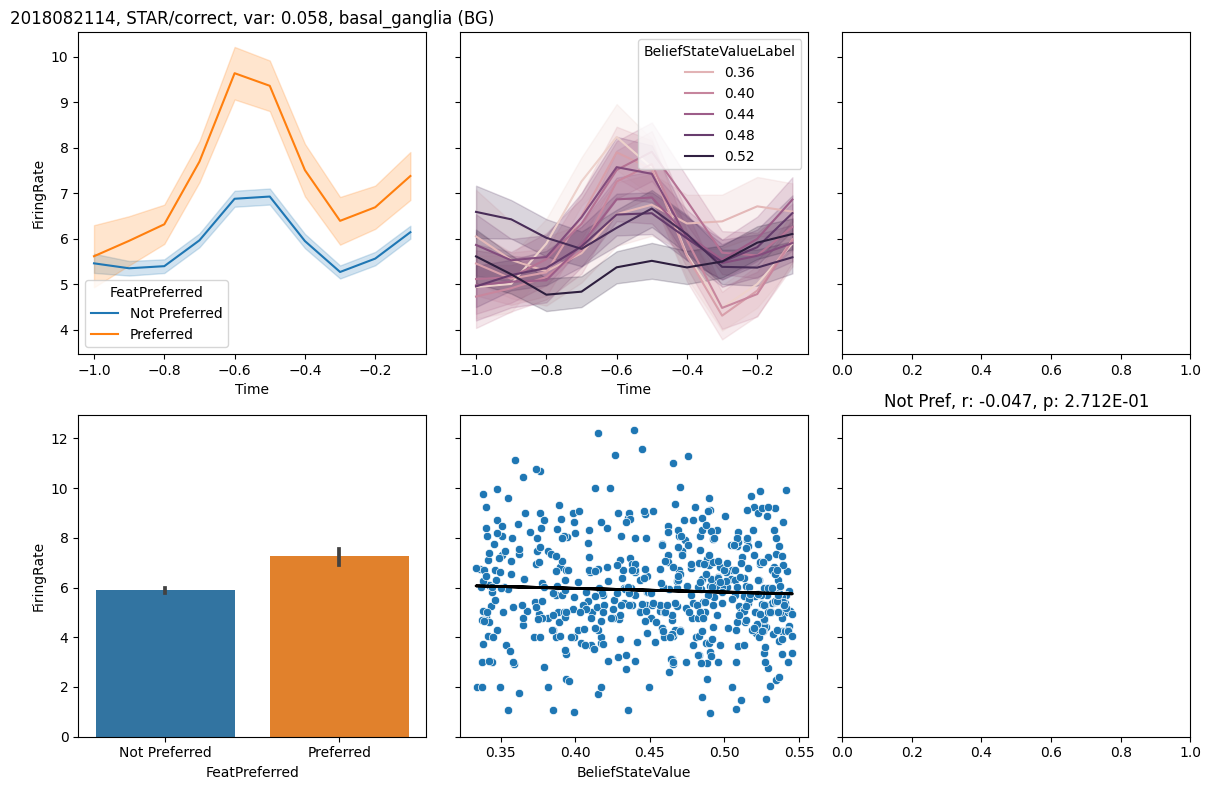

In [6]:
to_vis = good_pref_stim_res.sort_values("combined_fracvar", ascending=False)[:10]
args.time_range = [-1000, 0]
for i, unit in to_vis.iterrows():
    plot(args, unit)